In [224]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Dataset.csv
/kaggle/input/categoryjson/CA_category_id.json


In [225]:
#This project forecast whether a YouTube video will receive the most likes, comments, and views. 
#The makers of content might then receive an idea of how well the video 
#will do on YouTube and have a far deeper understanding of their target viewers.

## Importing the libraries

In [226]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [227]:
dataset = pd.read_csv('/kaggle/input/dataset/Dataset.csv')

# 1 Data Analysis

In [228]:
import json
with open("/kaggle/input/categoryjson/CA_category_id.json") as category:
    category = json.load(category)

In [229]:
#file contains details of various categories such as name,item,id,title etc
category

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [230]:
#fetching category id and name from category.
Category_id =[] 
Category_name = []
for each in category['items']:
    Category_id.append(each.get('id'))
    value = each.get('snippet')
    Category_name.append(value.get('title'))

In [231]:
#creating a dataframe containing category_id and name
category_dataframe = pd.DataFrame(
    {'category_id': Category_id,
     'Category_name': Category_name,
    
    })

In [232]:
dataset.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [233]:
category_dataframe['category_id']=category_dataframe['category_id'].astype(int)

In [234]:
category_dataframe

,category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [235]:
#merging dataset and category_dataframe
dataset = pd.merge(dataset,category_dataframe, on ='category_id', how = 'left')

In [236]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [237]:
dataset.shape

(40949, 17)

In [238]:
#Checking for presence of null values in dataset.
dataset.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
Category_name              57
dtype: int64

In [239]:
#finding out the percentage of  null values.
round(100*(dataset.isnull().sum()/len(dataset.index)),2)

video_id                  0.00
trending_date             0.00
title                     0.00
channel_title             0.00
category_id               0.00
publish_time              0.00
tags                      0.00
views                     0.00
likes                     0.00
dislikes                  0.00
comment_count             0.00
thumbnail_link            0.00
comments_disabled         0.00
ratings_disabled          0.00
video_error_or_removed    0.00
description               1.39
Category_name             0.14
dtype: float64

In [240]:
#finding the length of the description of the video.
descriptionLength=[len(str(x)) for x in dataset["description"]]
dataset["descriptionLength"]=descriptionLength

In [241]:
#finding the length of the title of the video.
titleLength=[len(str(x)) for x in dataset["title"]]
dataset["titleLength"]=titleLength

In [242]:
#finding the length of the hashtag
tagLength=[len(str(x)) for x in dataset["tags"]]
dataset["tagLength"]=tagLength

In [243]:
# here we drop the description column as its not related to our target.
dataset.drop(['description'],axis=1,inplace = True)
dataset.drop(['title'],axis=1,inplace = True)
dataset.drop(['tags'],axis=1,inplace = True)

In [244]:
publish_time = pd.to_datetime(dataset['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
dataset['publish_weekday']=publish_time.dt.day_name()

In [245]:
dataset['publish_weekday_id'] = dataset['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

In [246]:
#columns having numeric data type
num_cols = dataset._get_numeric_data().columns
print(num_cols)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'descriptionLength', 'titleLength', 'tagLength', 'publish_weekday_id'],
      dtype='object')


In [247]:
dataset.head(5)

,video_id,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Category_name,descriptionLength,titleLength,tagLength,publish_weekday,publish_weekday_id
0,2kyS6SvSYSE,17.14.11,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,People & Blogs,1410,34,15,Monday,1
1,1ZAPwfrtAFY,17.14.11,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Entertainment,630,62,102,Monday,1
2,5qpjK5DgCt4,17.14.11,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Comedy,1177,53,314,Sunday,7
3,puqaWrEC7tY,17.14.11,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Entertainment,1403,32,477,Monday,1
4,d380meD0W0M,17.14.11,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Entertainment,636,24,120,Sunday,7


In [248]:
# finding the categories.
category_value=dataset.category_id.value_counts().values
category_name= dataset.category_id.value_counts().index

In [249]:
# finding the number of views in each category. 
dataset.groupby('Category_name')['views'].sum()

Category_name
Autos & Vehicles          520690717
Comedy                   5117426208
Education                1180629990
Entertainment           20604388195
Film & Animation         7284156721
Gaming                   2141218625
Howto & Style            4078545064
Music                   40132892190
News & Politics          1473765704
People & Blogs           4917191726
Pets & Animals            764651989
Science & Technology     3487756816
Shows                      51501058
Sports                   4404456673
Travel & Events           343557084
Name: views, dtype: int64

<AxesSubplot:xlabel='Category_name'>

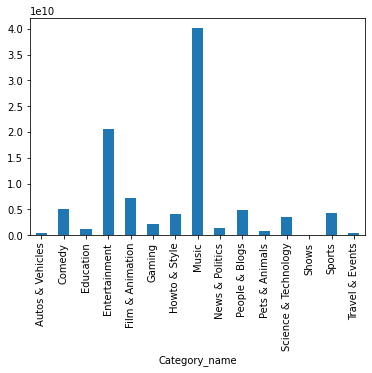

In [250]:
# finding the number of views in each category. (Represenation using bar graph)
dataset.groupby('Category_name')['views'].sum().plot(kind='bar')

In [251]:
# finding the number of likes in each category. 
dataset.groupby('Category_name')['likes'].sum()

Category_name
Autos & Vehicles           4245656
Comedy                   216346746
Education                 49257772
Entertainment            530516491
Film & Animation         165997476
Gaming                    69038284
Howto & Style            162880075
Music                   1416838584
News & Politics           18151033
People & Blogs           186615999
Pets & Animals            19370702
Science & Technology      82532638
Shows                      1082639
Sports                    98621211
Travel & Events            4836246
Name: likes, dtype: int64

<AxesSubplot:xlabel='Category_name'>

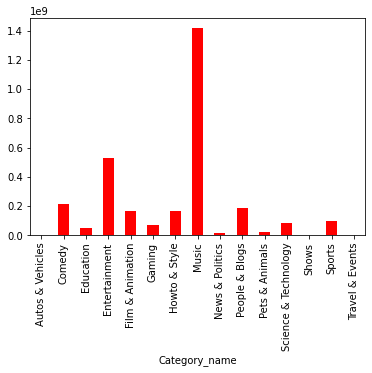

In [252]:
# finding the number of likes in each category (represenation). 
dataset.groupby('Category_name')['likes'].sum().plot(kind='bar', color = 'red')

In [253]:
# finding the number of dislikes in each category. 
dataset.groupby('Category_name')['dislikes'].sum()

Category_name
Autos & Vehicles          243010
Comedy                   7230391
Education                1351972
Entertainment           42987663
Film & Animation         6075148
Gaming                   9184466
Howto & Style            5473899
Music                   51179008
News & Politics          4180049
People & Blogs          10187901
Pets & Animals            527379
Science & Technology     4548402
Shows                      24508
Sports                   5133551
Travel & Events           340427
Name: dislikes, dtype: int64

<AxesSubplot:xlabel='Category_name'>

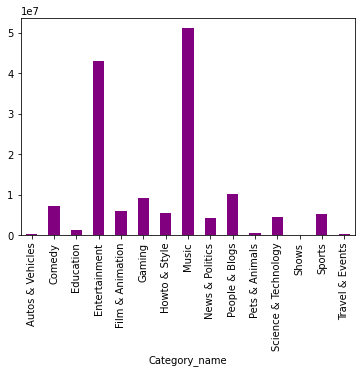

In [254]:
# finding the number of dislikes in each category(Represnation using graph). 
dataset.groupby('Category_name')['dislikes'].sum().plot(kind='bar', color = 'purple')

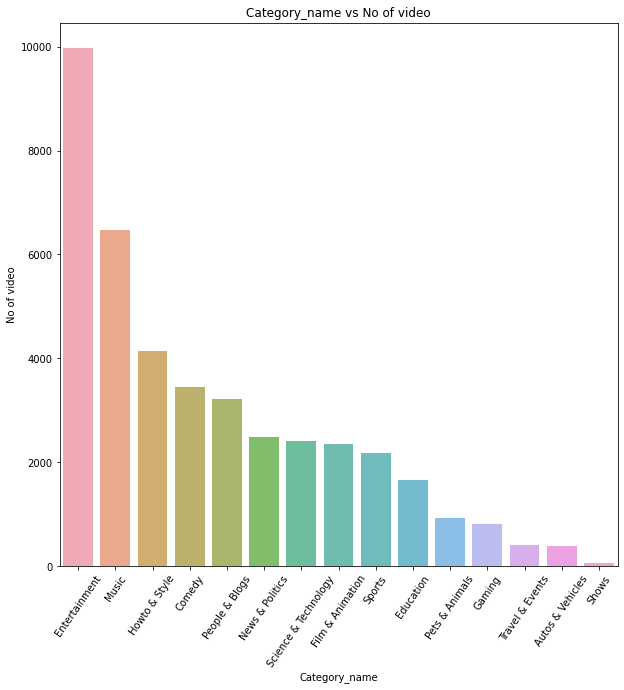

In [255]:
fig=plt.figure(figsize=(10,10))
count=dataset['Category_name'].value_counts()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('Category_name'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('Category_name'))
plt.tick_params(axis='x', rotation=55)
plt.show()          

<AxesSubplot:xlabel='publish_weekday'>

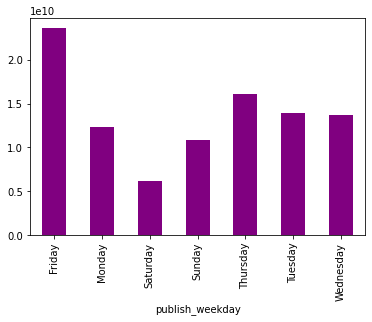

In [256]:
#plotting how many views a video gets if it has been releasized on a particular day.
dataset.groupby('publish_weekday')['views'].sum().plot(kind='bar', color = 'purple')

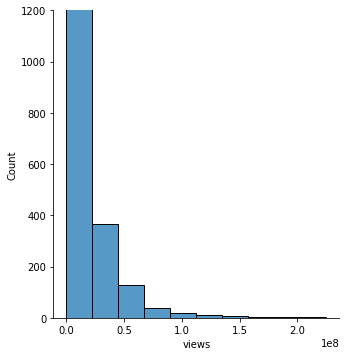

In [257]:
#plotting distribution plot for view
sns.displot(dataset['views'],bins=10).set(ylim=(0,1200))


In [258]:
#plotting distribution plot for likes

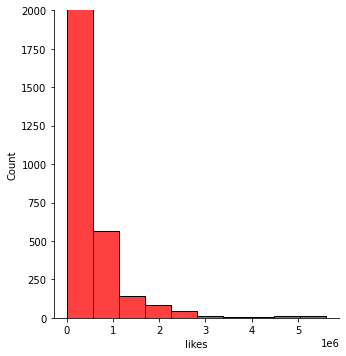

In [259]:
sns.displot(dataset['likes'],bins=10, color = 'red').set(ylim=(0,2000))


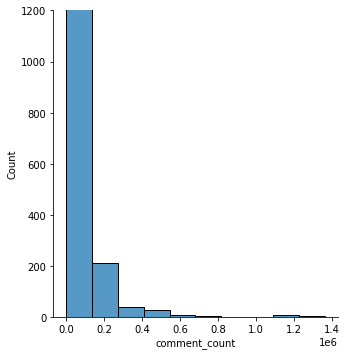

In [260]:
#plotting distribution plot for comments
sns.displot(dataset['comment_count'],bins=10).set(ylim=(0,1200))

In [261]:
dataset.head()

,video_id,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Category_name,descriptionLength,titleLength,tagLength,publish_weekday,publish_weekday_id
0,2kyS6SvSYSE,17.14.11,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,People & Blogs,1410,34,15,Monday,1
1,1ZAPwfrtAFY,17.14.11,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Entertainment,630,62,102,Monday,1
2,5qpjK5DgCt4,17.14.11,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Comedy,1177,53,314,Sunday,7
3,puqaWrEC7tY,17.14.11,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Entertainment,1403,32,477,Monday,1
4,d380meD0W0M,17.14.11,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Entertainment,636,24,120,Sunday,7


In [262]:
dataset.drop(['video_id','trending_date','channel_title','publish_time','thumbnail_link','Category_name'],axis=1,inplace = True)

In [263]:
dataset.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,descriptionLength,titleLength,tagLength,publish_weekday,publish_weekday_id
0,22,748374,57527,2966,15954,False,False,False,1410,34,15,Monday,1
1,24,2418783,97185,6146,12703,False,False,False,630,62,102,Monday,1
2,23,3191434,146033,5339,8181,False,False,False,1177,53,314,Sunday,7
3,24,343168,10172,666,2146,False,False,False,1403,32,477,Monday,1
4,24,2095731,132235,1989,17518,False,False,False,636,24,120,Sunday,7


In [264]:
dataset.drop(['video_error_or_removed'],axis=1,inplace = True)


In [265]:
dataset["comments_disabled"] = dataset["comments_disabled"].astype(int)

In [266]:
dataset.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength,publish_weekday,publish_weekday_id
0,22,748374,57527,2966,15954,0,False,1410,34,15,Monday,1
1,24,2418783,97185,6146,12703,0,False,630,62,102,Monday,1
2,23,3191434,146033,5339,8181,0,False,1177,53,314,Sunday,7
3,24,343168,10172,666,2146,0,False,1403,32,477,Monday,1
4,24,2095731,132235,1989,17518,0,False,636,24,120,Sunday,7


In [267]:
len(dataset[dataset['comments_disabled'] == 0])

40316

In [268]:
len(dataset[dataset['comments_disabled'] == 1])

633

In [269]:
dataset.head(5)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength,publish_weekday,publish_weekday_id
0,22,748374,57527,2966,15954,0,False,1410,34,15,Monday,1
1,24,2418783,97185,6146,12703,0,False,630,62,102,Monday,1
2,23,3191434,146033,5339,8181,0,False,1177,53,314,Sunday,7
3,24,343168,10172,666,2146,0,False,1403,32,477,Monday,1
4,24,2095731,132235,1989,17518,0,False,636,24,120,Sunday,7


In [270]:
dataset["ratings_disabled"] = dataset["ratings_disabled"].astype(int)

In [271]:
dataset.drop(['publish_weekday'],axis=1,inplace = True)

In [272]:
# finding correlation matrix for the dataset.
dataset.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength,publish_weekday_id
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,0.092042,0.024199,0.142369,0.009733
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.014341,-0.035612,-0.016067,0.040135
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.013894,-0.078166,-0.061686,0.047442
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.019531,-0.031235,0.001948,0.009926
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.011043,-0.067043,-0.024248,0.028854
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.067989,0.026668,-0.050789,0.012857
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.023183,0.001442,-0.047453,-0.005513
descriptionLength,0.092042,-0.014341,-0.013894,-0.019531,-0.011043,-0.067989,-0.023183,1.000000,0.063236,0.375128,0.014126
titleLength,0.024199,-0.035612,-0.078166,-0.031235,-0.067043,0.026668,0.001442,0.063236,1.000000,0.226039,-0.048196
tagLength,0.142369,-0.016067,-0.061686,0.001948,-0.024248,-0.050789,-0.047453,0.375128,0.226039,1.000000,-0.000926


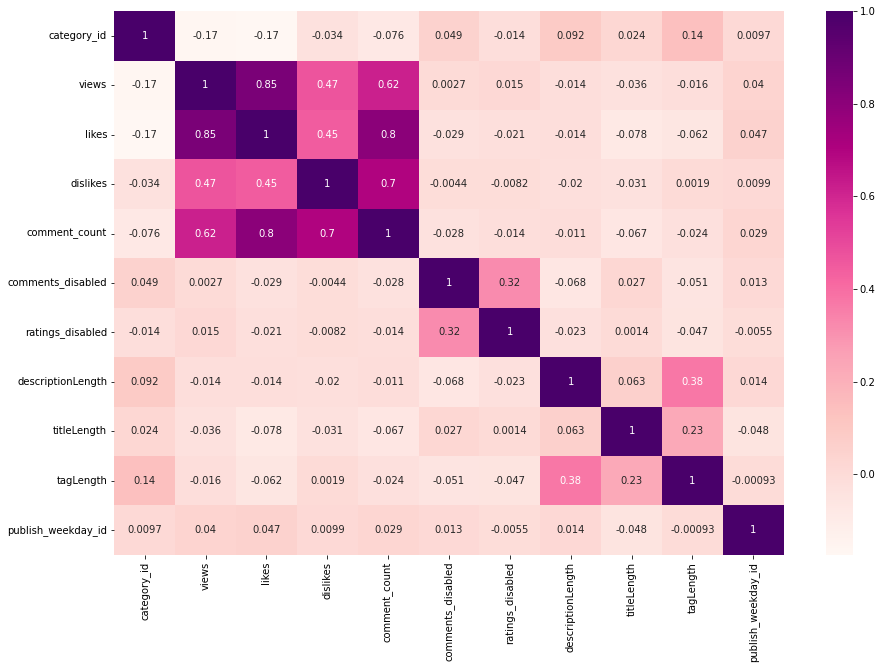

In [273]:
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(dataset.corr(), cmap="RdPu", annot=True)

In [274]:
dataset.drop(['publish_weekday_id'],axis=1,inplace = True)

In [275]:
dataset.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,0.015458,0.004127,1031.522772,48.578183,275.866663
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,0.123368,0.064110,854.990394,19.619025,169.710509
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,3.000000,4.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,0.000000,0.000000,419.000000,34.000000,119.000000
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,0.000000,0.000000,827.000000,46.000000,265.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,0.000000,0.000000,1388.000000,61.000000,445.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,1.000000,1.000000,5123.000000,100.000000,628.000000


# Model Building


## Predicting likes using comments and views.

In [276]:
#creating a two datasets having feature values and label values.
dataset_model = dataset.copy()
dataset_model.drop(['likes'],axis = 1, inplace =True)
likes = dataset['likes']


In [277]:
x_train,x_test,y_train,y_test=train_test_split(dataset_model,likes, test_size=0.3,shuffle=False, random_state = 42)

In [278]:
#scaling the data.
#scaling x train.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)

In [279]:
#scale x test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


In [280]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [281]:
model.score(x_train_scaled,y_train)

0.8337282909110774

In [282]:
y_pred= model.predict(x_test_scaled)  

In [283]:
score_linear = r2_score(y_test,y_pred)

In [284]:
score_linear

0.9009238411478293

In [285]:
linearRegression_results = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
linearRegression_results

,Actual Values,Predicted Values
28664,230020,2.248615e+05
28665,18321,1.354629e+04
28666,2081120,1.129746e+06
28667,260581,1.965005e+05
28668,30936,5.320493e+04
...,...,...
40944,38160,5.228713e+04
40945,60008,4.476788e+04
40946,48068,2.453516e+04
40947,192957,1.845286e+05


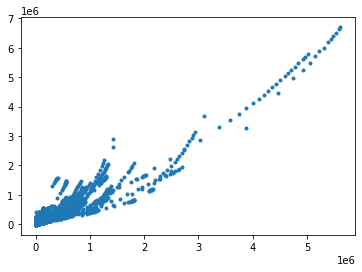

In [286]:
plt.plot(y_test, y_pred, ".")

## Multioutput Regressor

In [287]:
from sklearn.multioutput import MultiOutputRegressor

In [288]:
# dataset model contains all the Feature values except views, likes and comments which are used as target variables.
X=dataset_model.copy()
views = dataset['views']
likes = dataset['likes']
comments = dataset['comment_count']
Y = pd.DataFrame(views)
Y['likes'] = likes
Y['comment_count'] = comments

In [289]:
#contains all the feature values.
X.head(5)

,category_id,views,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength
0,22,748374,2966,15954,0,0,1410,34,15
1,24,2418783,6146,12703,0,0,630,62,102
2,23,3191434,5339,8181,0,0,1177,53,314
3,24,343168,666,2146,0,0,1403,32,477
4,24,2095731,1989,17518,0,0,636,24,120


In [290]:
#contains all the target values.
Y.head(5)

,views,likes,comment_count
0,748374,57527,15954
1,2418783,97185,12703
2,3191434,146033,8181
3,343168,10172,2146
4,2095731,132235,17518


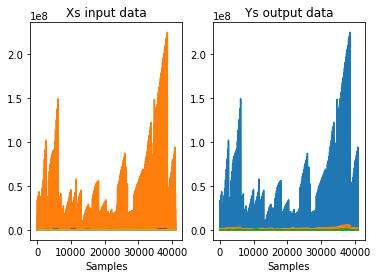

In [291]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.title("Xs input data")
plt.plot(X)
plt.xlabel("Samples")
f.add_subplot(1,2,2)
plt.title("Ys output data")
plt.plot(Y)
plt.xlabel("Samples")
plt.show()

In [292]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.3, random_state = 42)

In [293]:
xtrain.head(5)

,category_id,views,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength
15557,10,1171252,1568,6562,0,0,544,48,58
38886,10,35014308,40525,37795,0,0,2386,36,455
16157,10,28256,15,12,0,0,1351,43,33
4659,23,292528,425,1930,0,0,1153,68,405
5568,10,41027,74,119,0,0,655,68,463


In [294]:
xtest.head(5)

,category_id,views,dislikes,comment_count,comments_disabled,ratings_disabled,descriptionLength,titleLength,tagLength
15632,10,206028,329,2951,0,0,256,47,465
40759,22,402418,3303,2142,0,0,1071,40,260
10536,24,1437372,1626,2233,0,0,126,60,416
11029,24,417790,346,2000,0,0,710,68,488
8202,24,816662,468,1038,0,0,2343,48,510


In [295]:
ytrain.head(5)

,views,likes,comment_count
15557,1171252,66728,6562
38886,35014308,604280,37795
16157,28256,105,12
4659,292528,11371,1930
5568,41027,1483,119


In [296]:
ytest.head(5)

,views,likes,comment_count
15632,206028,21951,2951
40759,402418,10070,2142
10536,1437372,33670,2233
11029,417790,13878,2000
8202,816662,16873,1038


In [297]:
linearRegression = LinearRegression()
model = MultiOutputRegressor(estimator=linearRegression)
model

MultiOutputRegressor(estimator=LinearRegression())

In [298]:
model.fit(xtrain,ytrain)
score = model.score(xtrain, ytrain)
score

0.9621128258041604

In [299]:
y_pred = model.predict(xtest)
y_pred

array([[2.06028000e+05, 2.03143614e+04, 2.95100000e+03],
       [4.02418000e+05, 1.67149042e+04, 2.14200000e+03],
       [1.43737200e+06, 2.25120152e+04, 2.23300000e+03],
       ...,
       [9.40490000e+05, 3.54174524e+04, 1.05500000e+03],
       [1.91381800e+06, 5.93182038e+04, 5.01200000e+03],
       [8.70781000e+05, 2.59700524e+04, 1.34500000e+03]])

In [300]:
from sklearn.metrics import r2_score

y1_score=r2_score(ytest.views, y_pred[:,0])
y2_score=r2_score(ytest.likes, y_pred[:,1])
y3_score=r2_score(ytest.comment_count, y_pred[:,2])

 

In [301]:
y1_score

1.0

In [302]:
y2_score

0.8901004932170137

In [303]:
y3_score

1.0

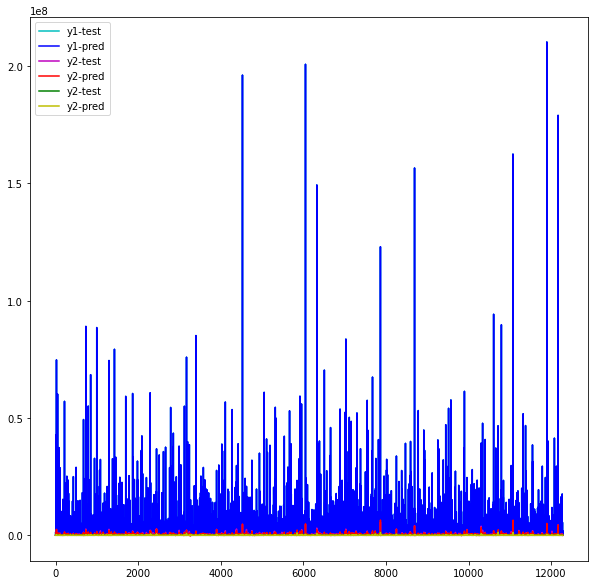

In [304]:
plt.figure(figsize=(10,10))
x_ax = range(len(xtest))
plt.plot(x_ax, ytest.views, label="y1-test", color='c')
plt.plot(x_ax, y_pred[:,0], label="y1-pred", color='b')
plt.plot(x_ax, ytest.likes, label="y2-test", color='m')
plt.plot(x_ax, y_pred[:,1], label="y2-pred", color='r')
plt.plot(x_ax, ytest.comment_count, label="y2-test", color='g')
plt.plot(x_ax, y_pred[:,2], label="y2-pred", color='y')
plt.legend()
plt.show()

# Evaluation

In [305]:
print("The RMSE Score of linear regression",score_linear)

The RMSE Score of linear regression 0.9009238411478293


In [306]:
print("The RMSE score of multioutput regressor for views = {0} likes = {1} comments = {2}".format(y1_score, y2_score, y3_score))

The RMSE score of multioutput regressor for views = 1.0 likes = 0.8901004932170137 comments = 1.0
